In [79]:
%matplotlib inline
import numpy as np

size = 8                                                       
costs = np.array([[1,2,3,4,5,6,100,8],[9,10,100,12,100,100,100,16],[17,18,100,20,21,22,100,24],[25,26,100,100,100,30,31,32],[100,34,35,36,100,38,39,40],[41,42,43,44,100,46,100,48],[100,100,100,52,53,54,100,56],[57,58,59,60,61,100,100,0]])
wall = [(0,6),(1,2),(1,4),(1,5),(1,6),(2,2),(2,6),(3,2),(3,3),(3,4),(4,0),(4,4),(5,4),(5,6),(6,0),(6,1),(6,2),(6,6),(7,5),(7,6)]
                            
goal = (size-1,size-1) 

actions = ["up","down","left","right"]  


def cost(pos): 
    p = [pos[0],pos[1]]
    
    for i in [0,1]:  
        if p[i] < 0:        p[i] = 0
        if p[i] >= size: p[i] = size - 1
        
    
            
    return costs[p[0]][p[1]]

描画

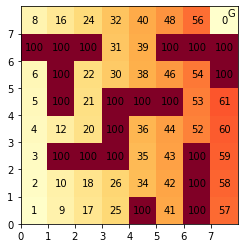

In [80]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos, action):  
    fig, ax = plt.subplots()
    mp = ax.pcolor(costs.T, cmap=plt.cm.YlOrRd,vmin=0,vmax=100)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(costs)):
        for y in range(len(costs[0])):
            plt.text(x+0.5,y+0.5,costs[x][y],ha = 'center', va = 'center', size=10)
            
    plt.text(goal[0]+0.75,goal[1]+0.75,"G",ha = 'center', va = 'center', size=10)
    
    if mark_pos != None:
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,action,ha = 'center', va = 'center', size=10)
            
    plt.show()
    fig.clear()
    
draw(None,None)

行動価値の計算

In [81]:
def action_value(pos, action, goal):
    if pos == goal: return cost(pos)
    
    if pos == (0,6): return cost(pos)
    if pos == (1,2): return cost(pos)
    if pos == (1,4): return cost(pos)
    if pos == (1,5): return cost(pos)
    if pos == (1,6): return cost(pos)
    if pos == (2,2): return cost(pos)
    if pos == (2,6): return cost(pos)
    if pos == (3,2): return cost(pos)
    if pos == (3,3): return cost(pos)
    if pos == (3,4): return cost(pos)
    if pos == (4,0): return cost(pos)
    if pos == (4,4): return cost(pos)
    if pos == (5,4): return cost(pos)
    if pos == (5,6): return cost(pos)
    if pos == (6,0): return cost(pos)
    if pos == (6,1): return cost(pos)
    if pos == (6,2): return cost(pos)
    if pos == (6,6): return cost(pos)
    if pos == (7,5): return cost(pos)
    if pos == (7,6): return cost(pos)
    
    if    action == "up":      return 1+cost((pos[0],pos[1]+1))
    elif action == "down": return 1+cost((pos[0],pos[1]-1))
    elif action == "left":    return 1+cost((pos[0]-1,pos[1]))
    elif action == "right":  return 1+cost((pos[0]+1,pos[1]))

スイープ

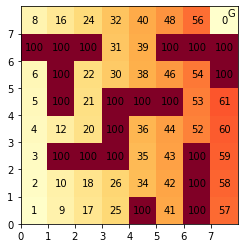

sweep 1


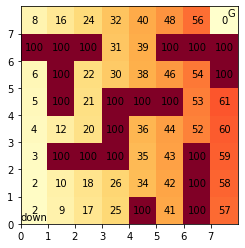

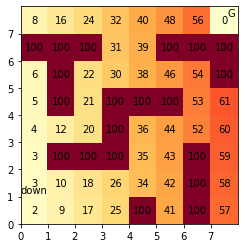

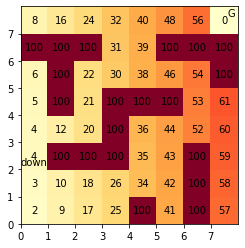

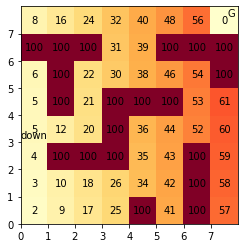

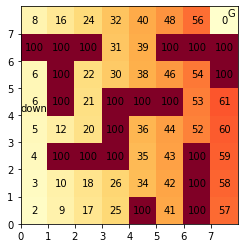

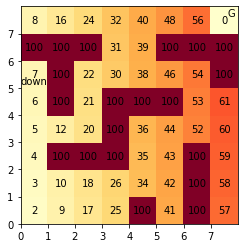

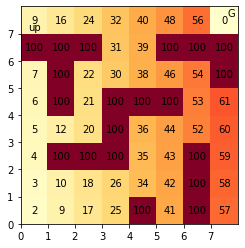

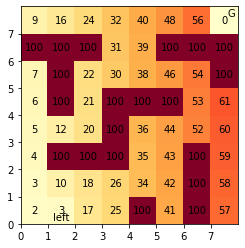

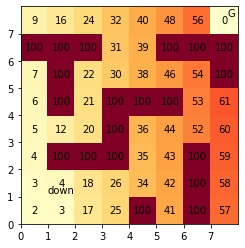

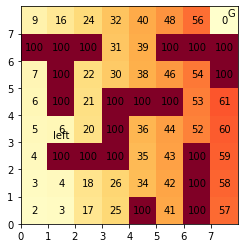

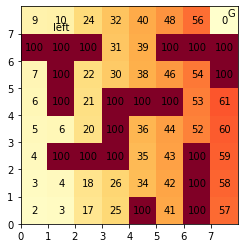

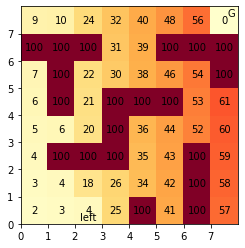

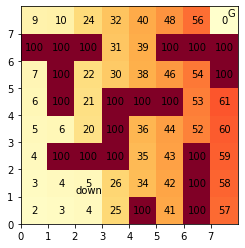

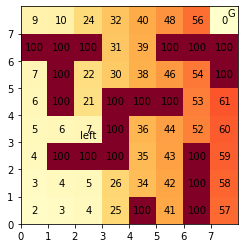

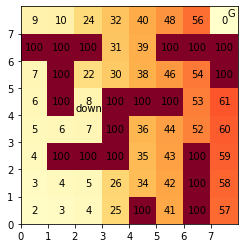

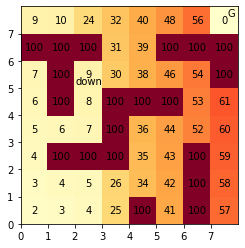

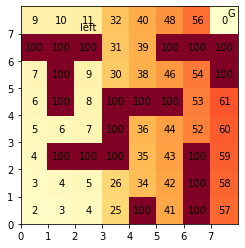

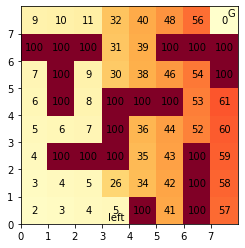

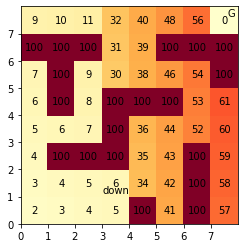

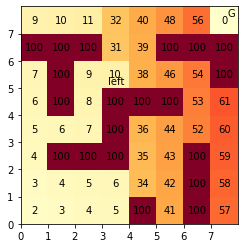

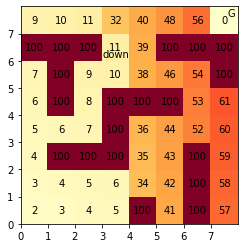

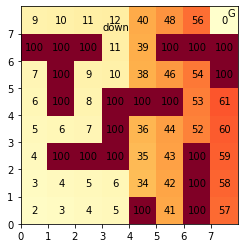

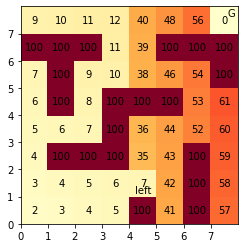

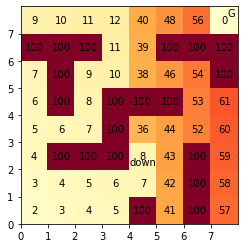

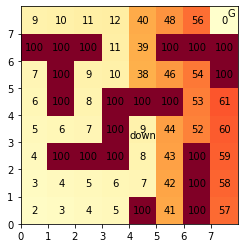

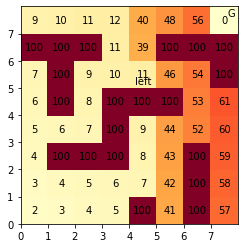

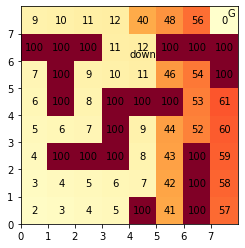

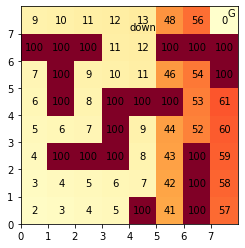

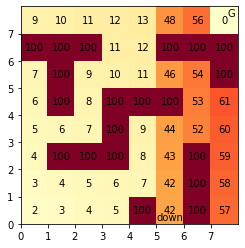

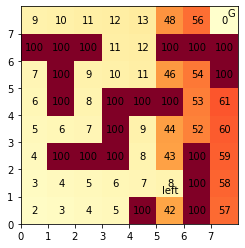

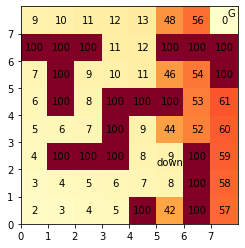

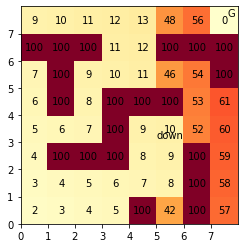

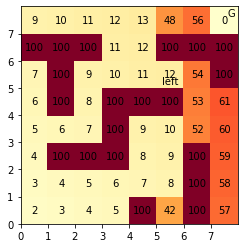

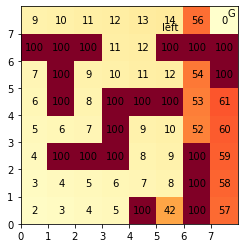

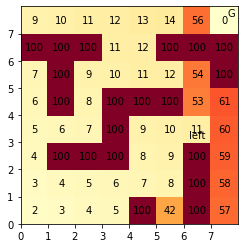

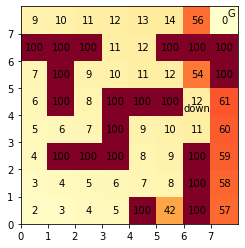

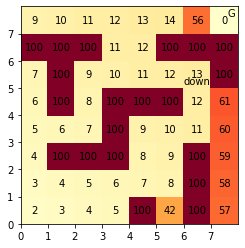

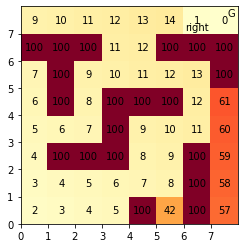

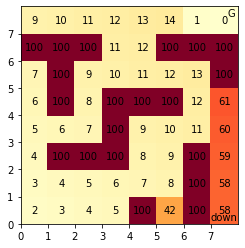

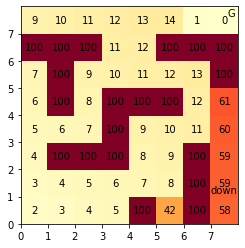

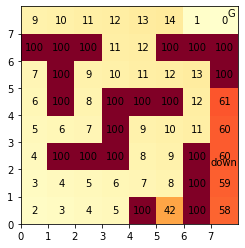

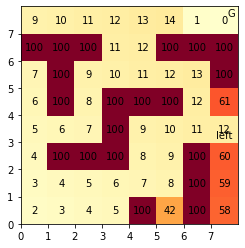

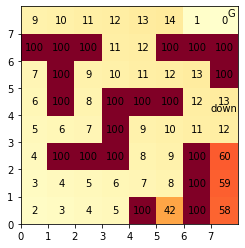

sweep 2


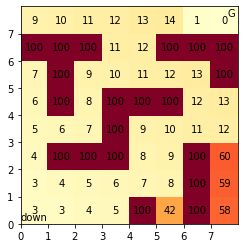

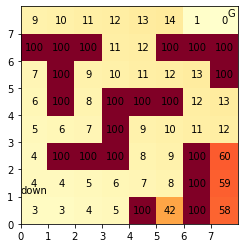

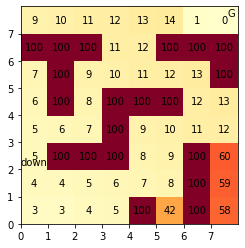

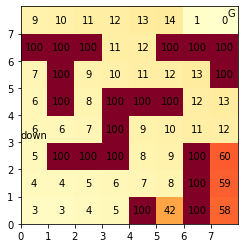

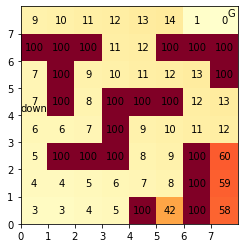

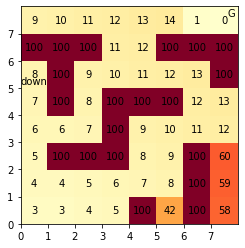

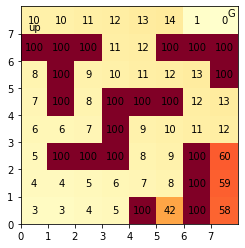

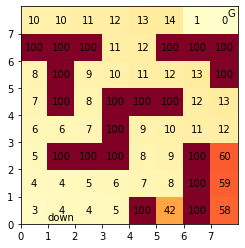

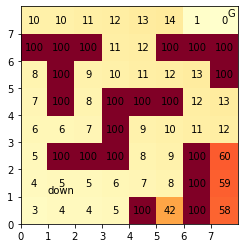

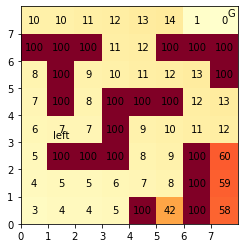

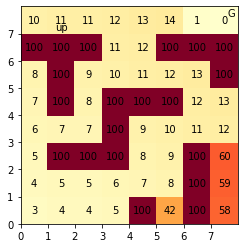

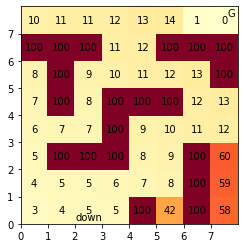

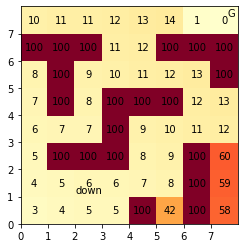

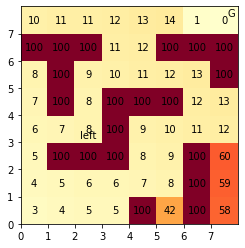

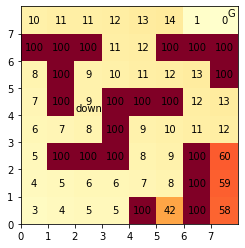

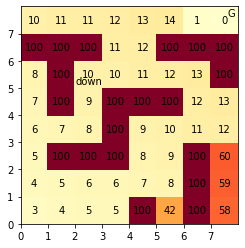

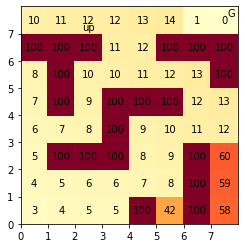

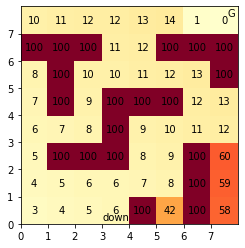

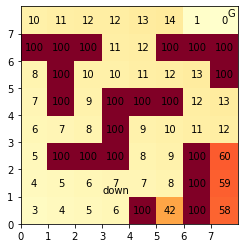

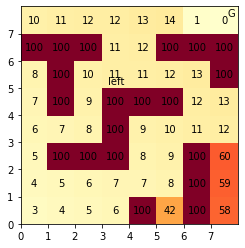

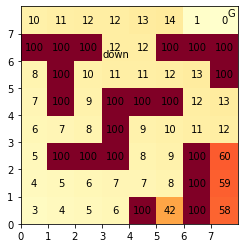

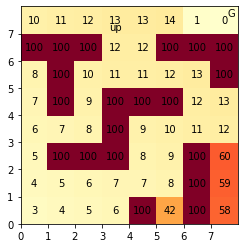

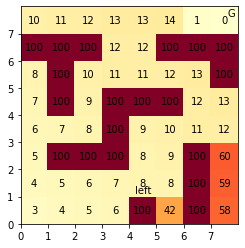

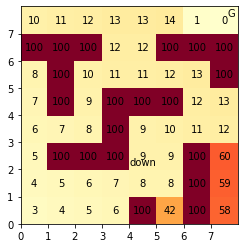

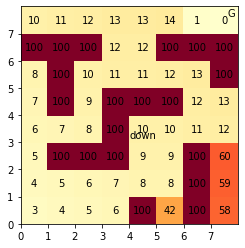

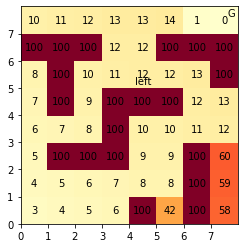

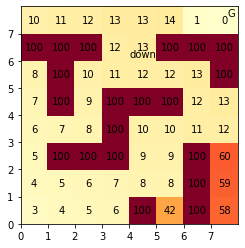

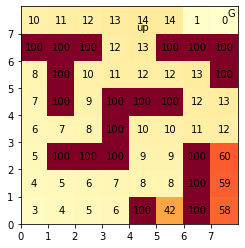

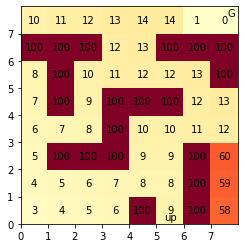

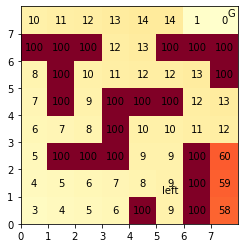

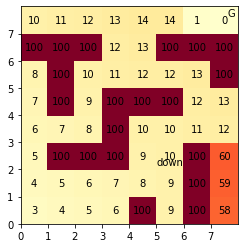

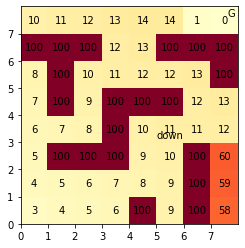

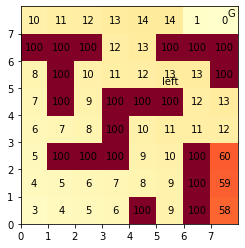

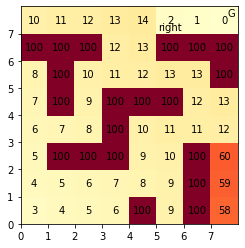

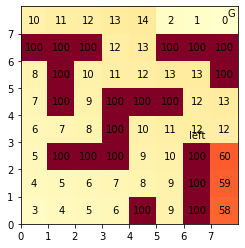

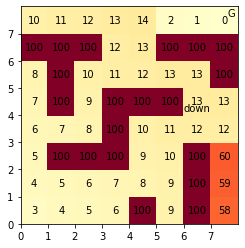

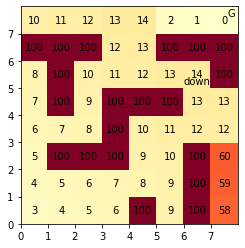

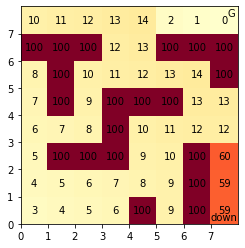

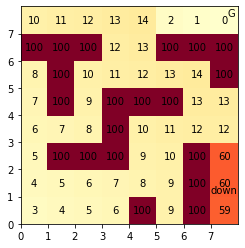

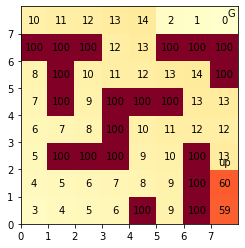

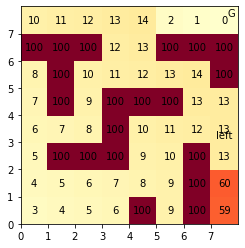

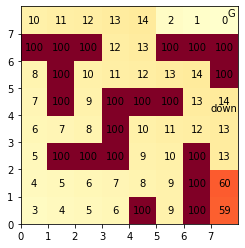

sweep 3


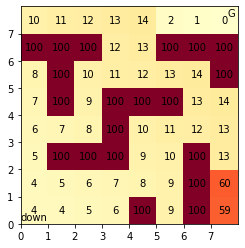

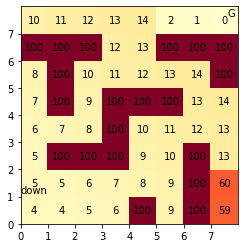

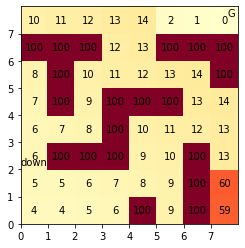

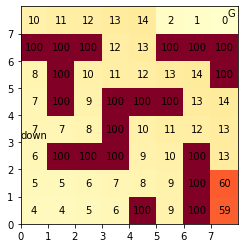

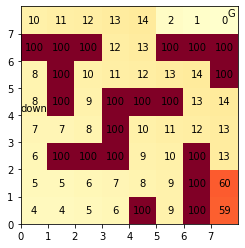

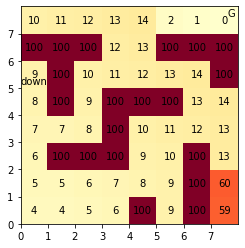

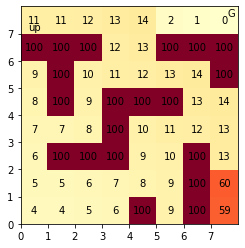

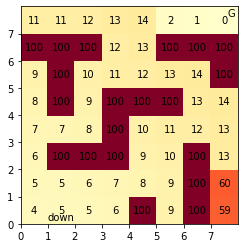

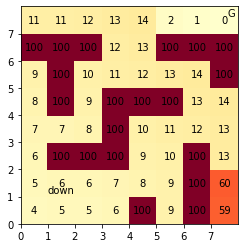

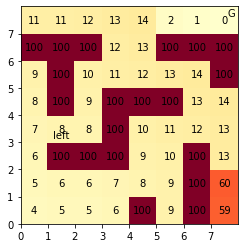

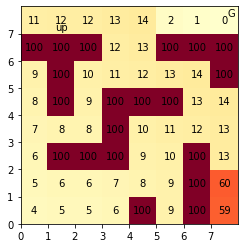

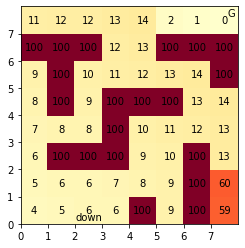

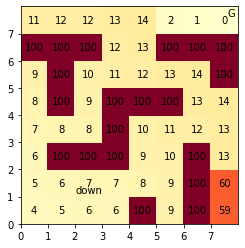

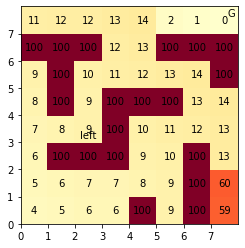

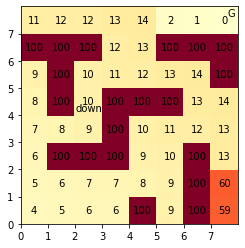

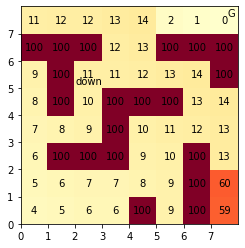

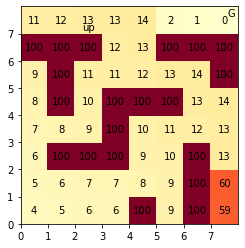

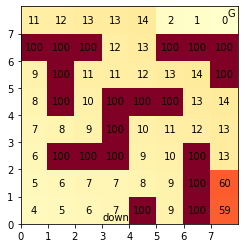

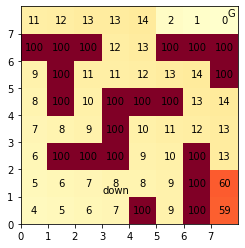

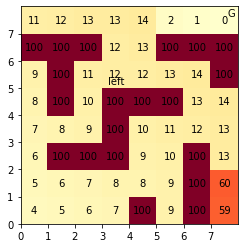

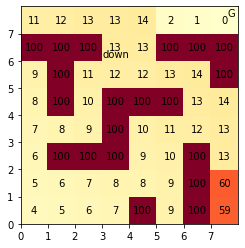

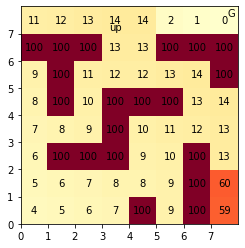

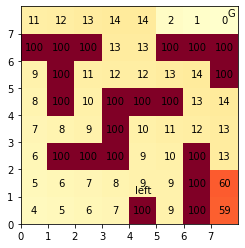

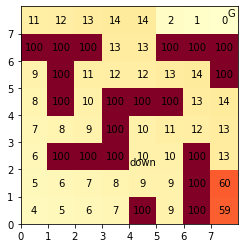

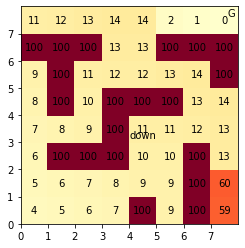

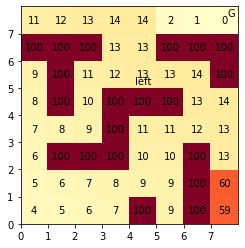

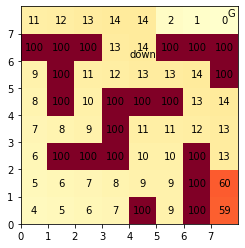

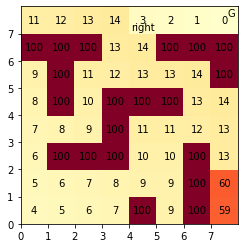

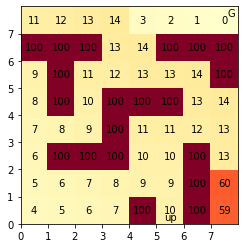

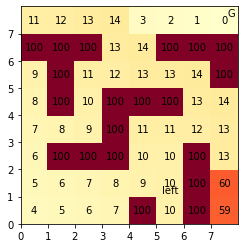

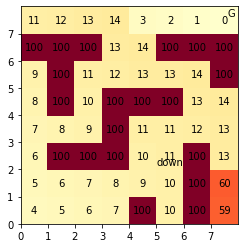

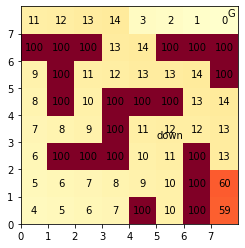

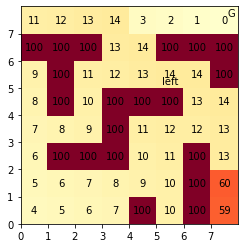

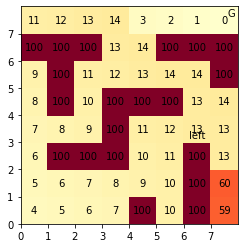

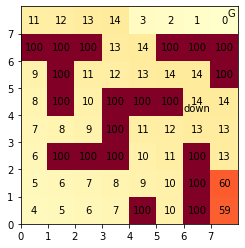

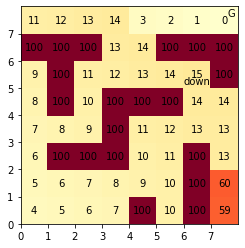

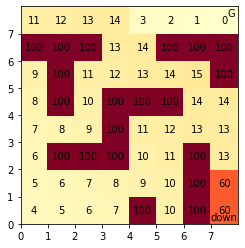

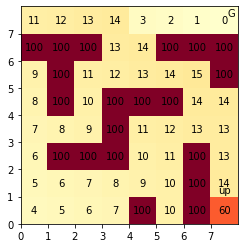

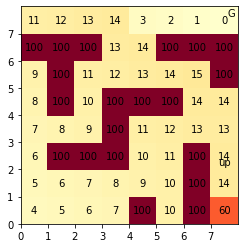

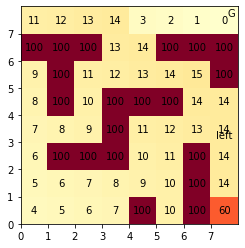

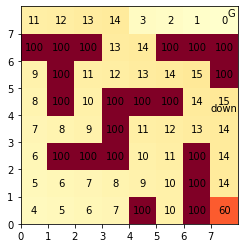

sweep 4


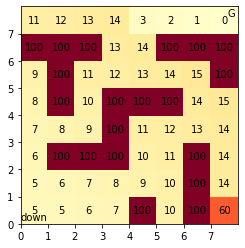

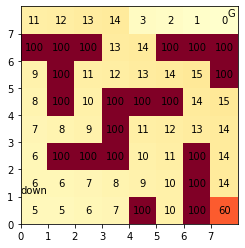

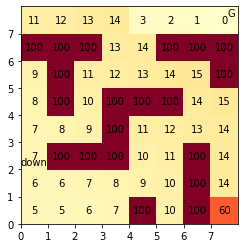

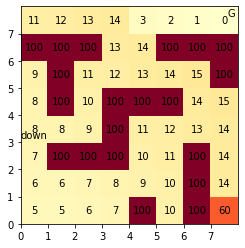

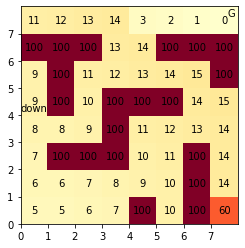

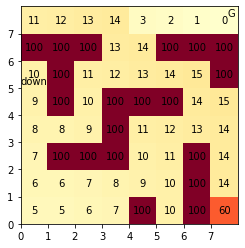

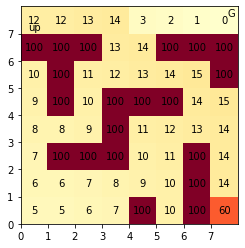

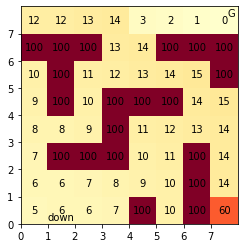

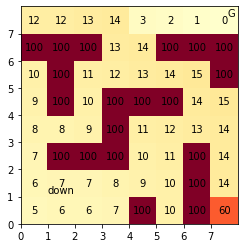

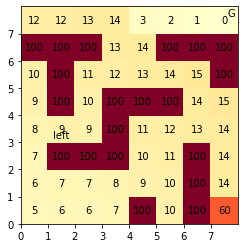

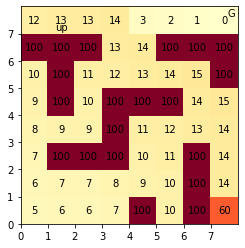

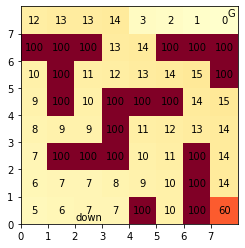

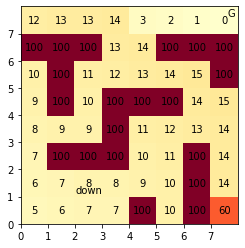

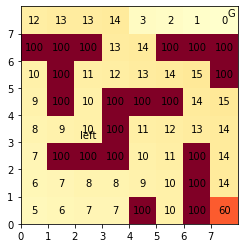

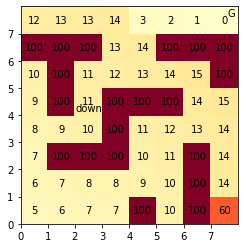

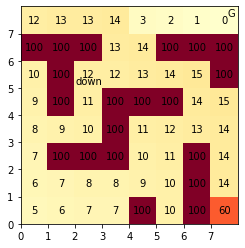

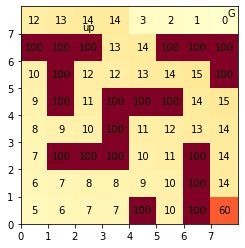

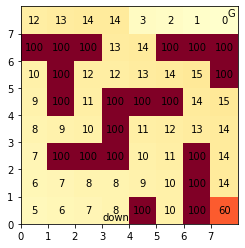

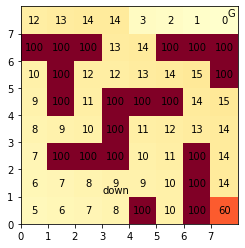

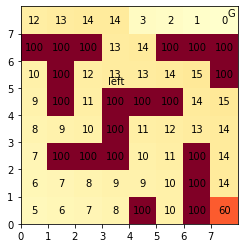

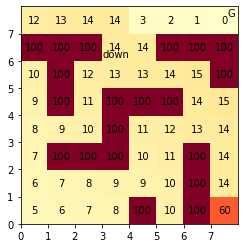

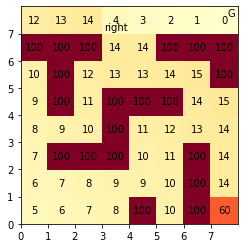

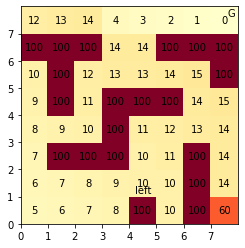

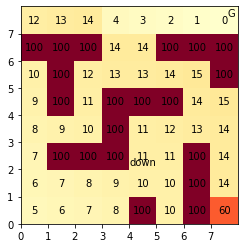

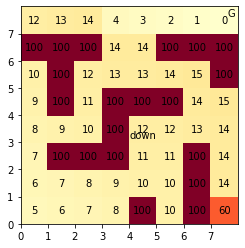

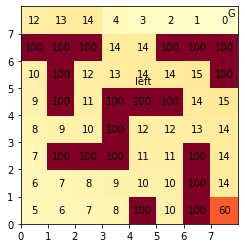

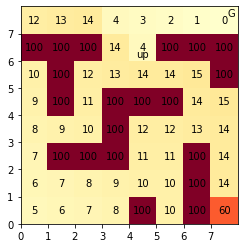

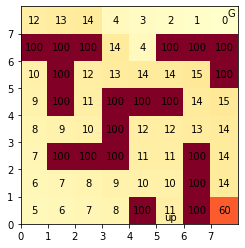

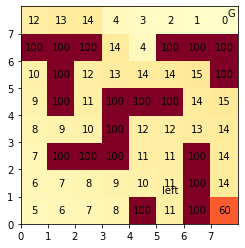

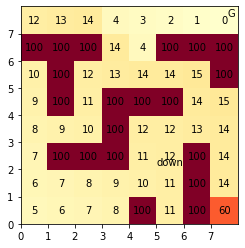

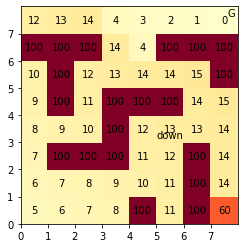

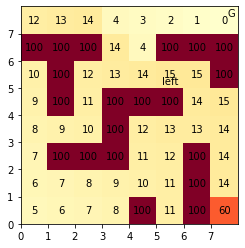

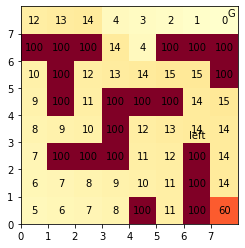

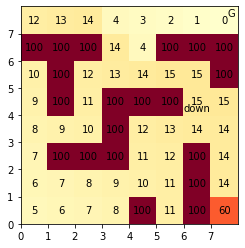

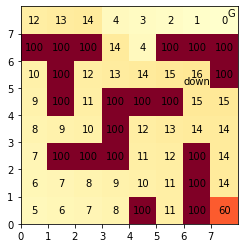

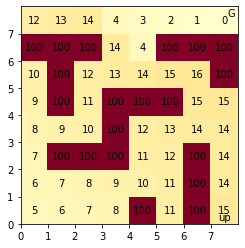

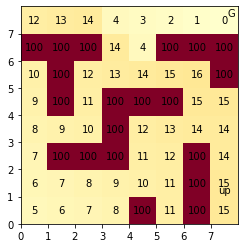

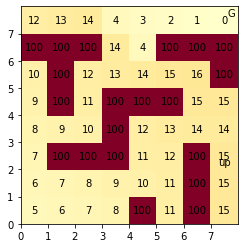

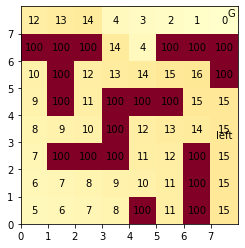

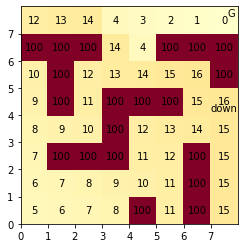

sweep 5


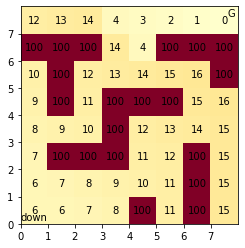

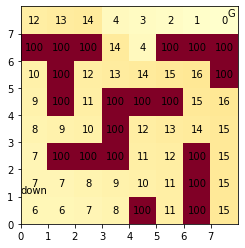

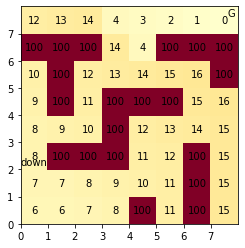

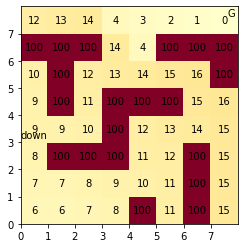

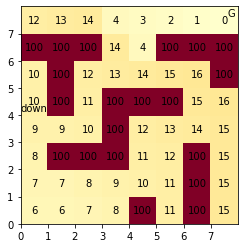

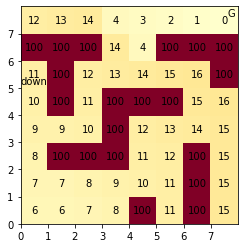

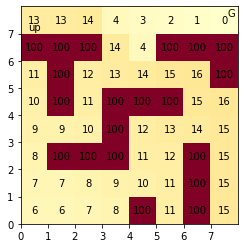

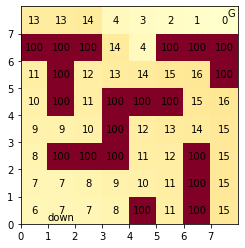

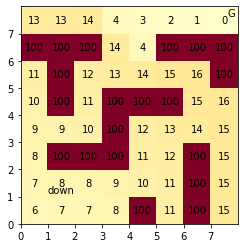

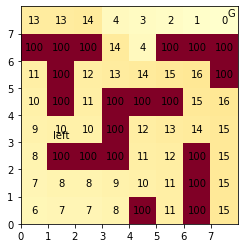

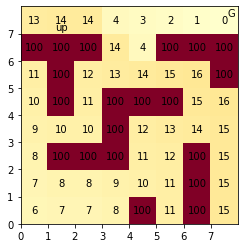

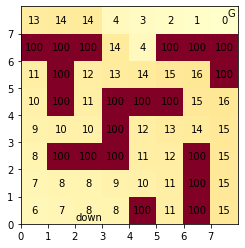

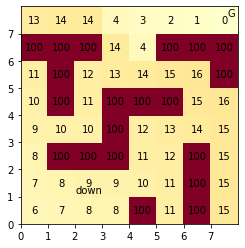

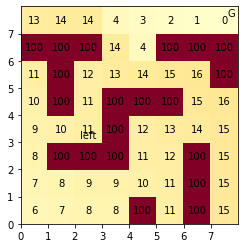

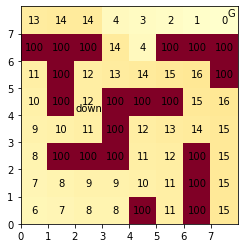

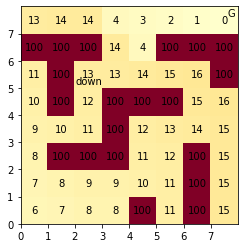

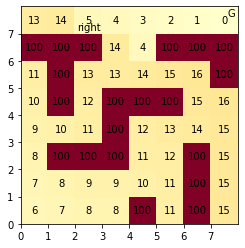

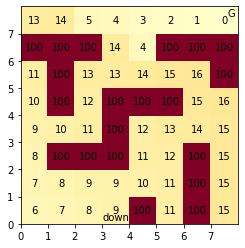

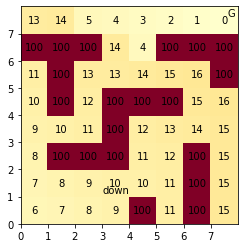

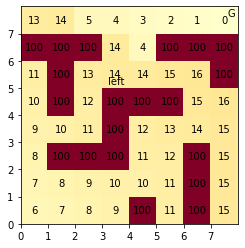

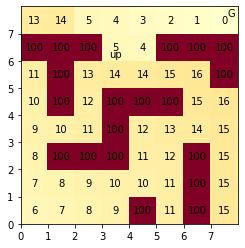

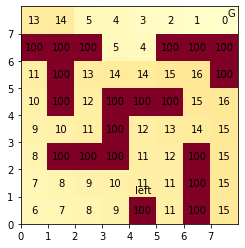

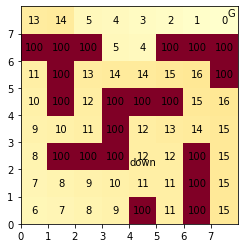

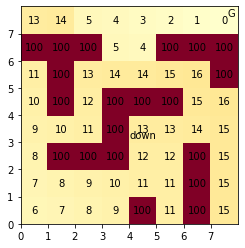

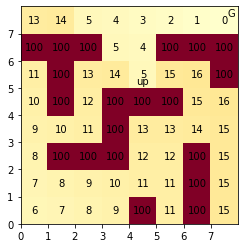

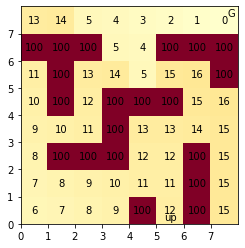

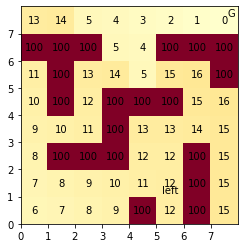

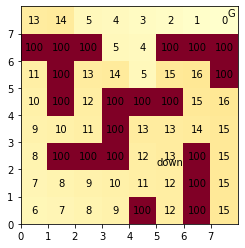

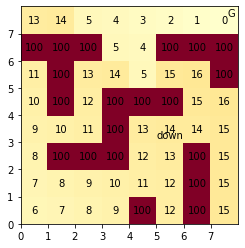

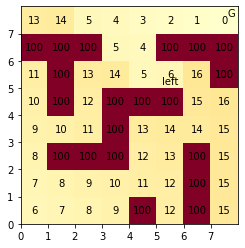

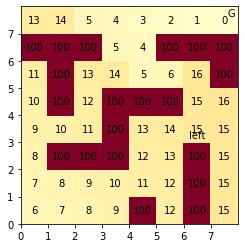

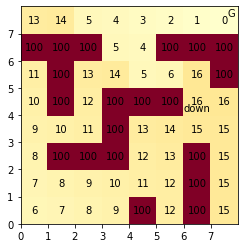

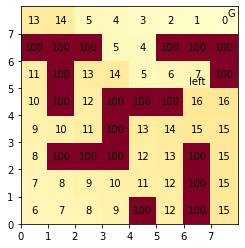

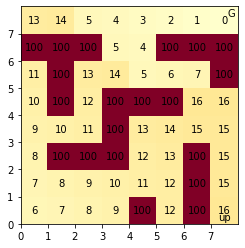

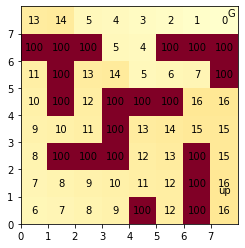

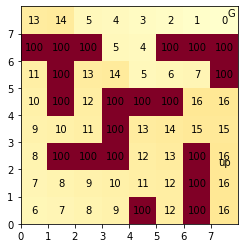

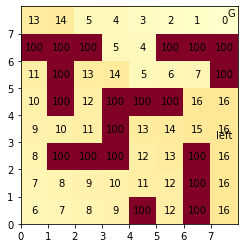

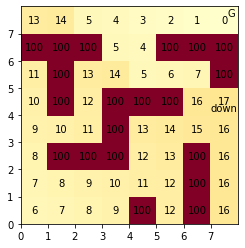

sweep 6


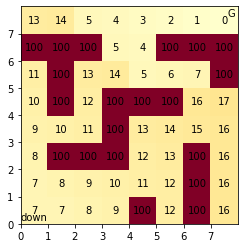

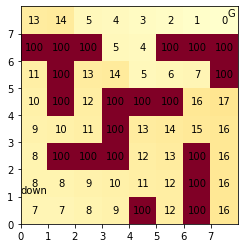

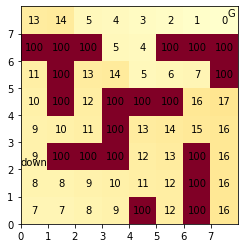

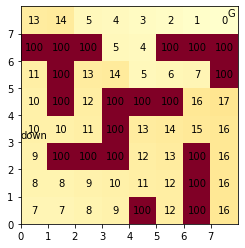

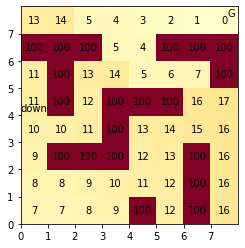

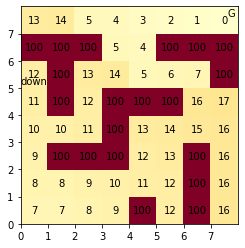

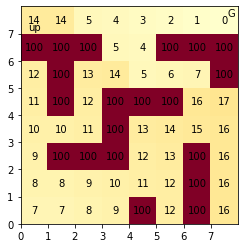

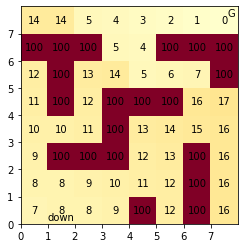

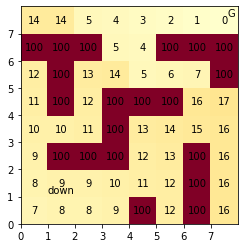

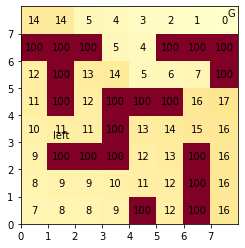

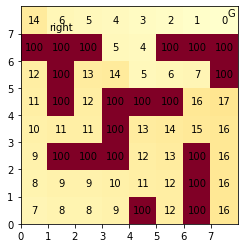

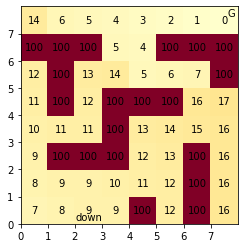

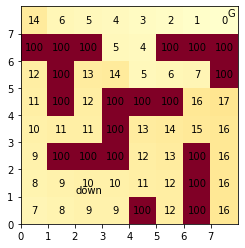

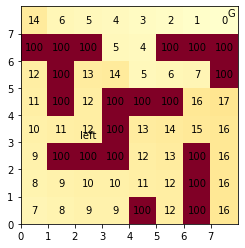

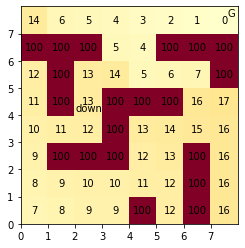

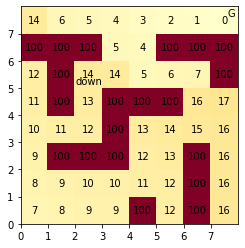

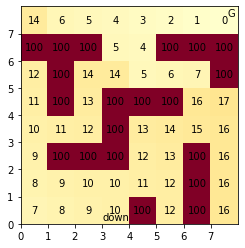

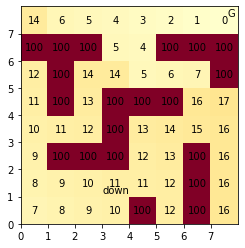

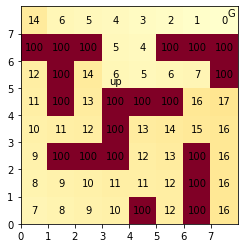

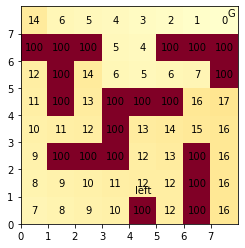

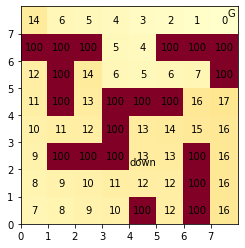

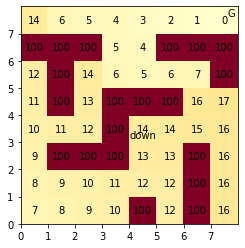

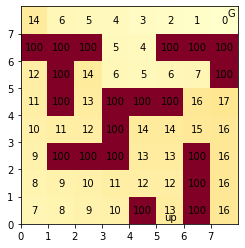

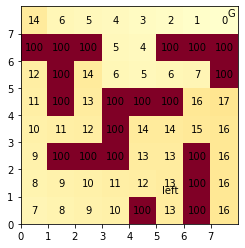

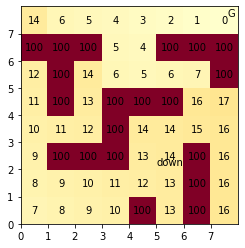

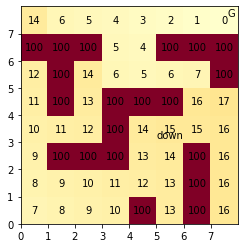

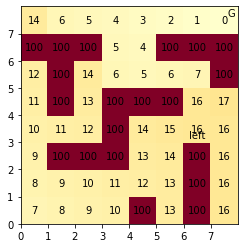

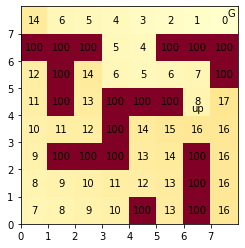

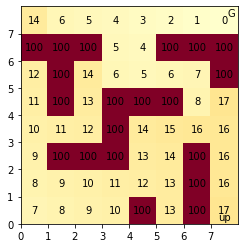

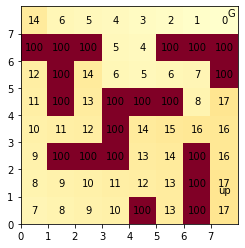

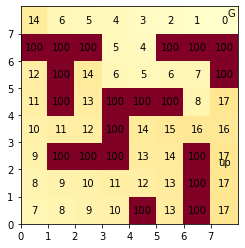

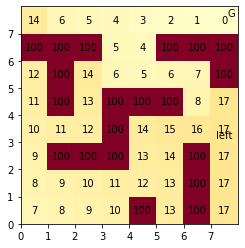

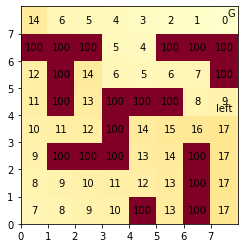

sweep 7


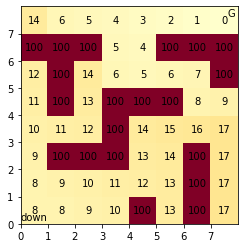

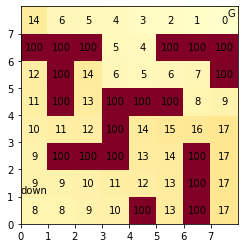

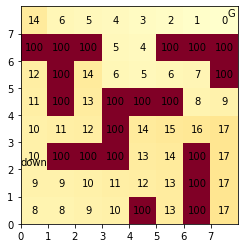

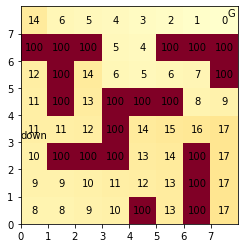

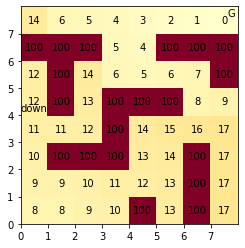

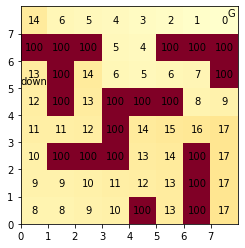

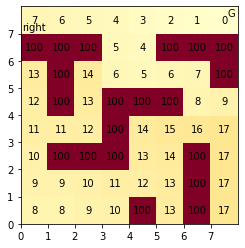

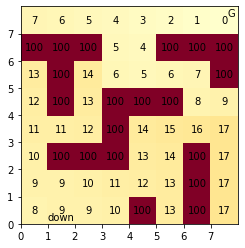

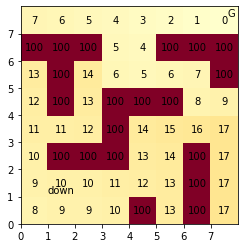

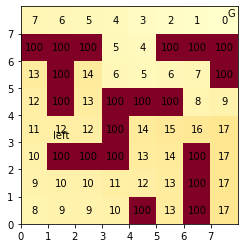

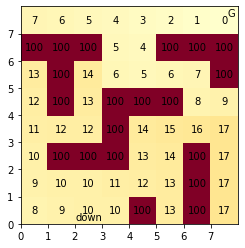

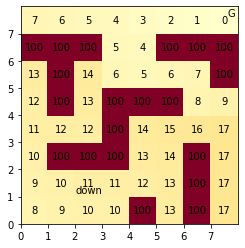

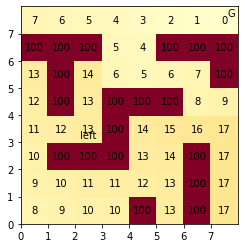

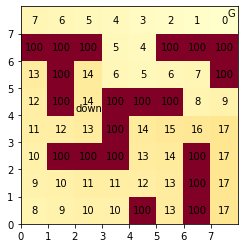

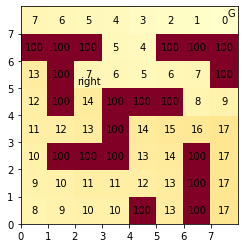

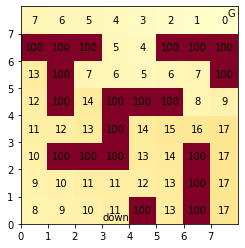

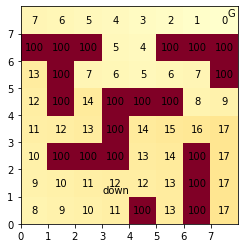

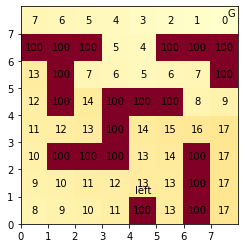

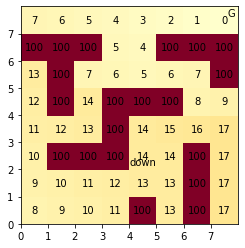

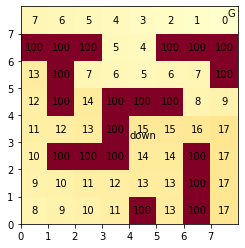

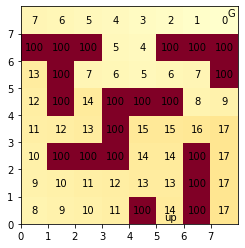

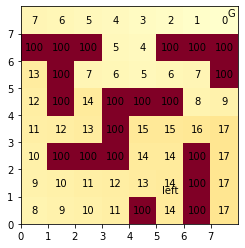

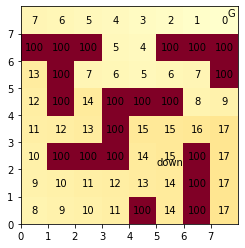

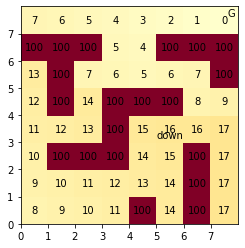

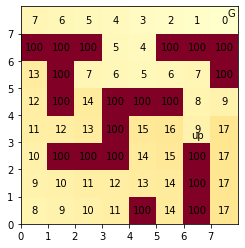

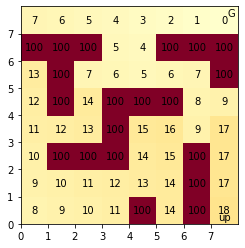

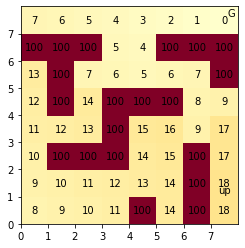

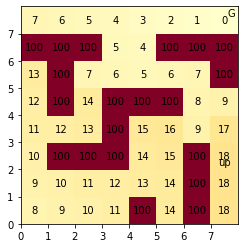

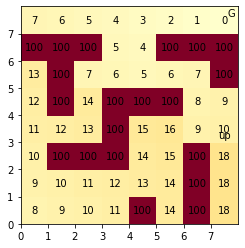

sweep 8


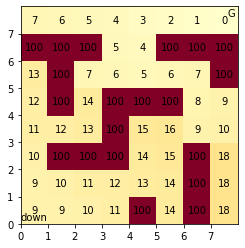

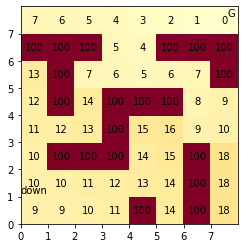

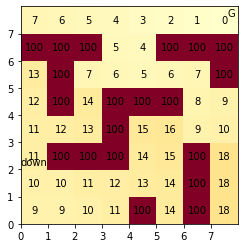

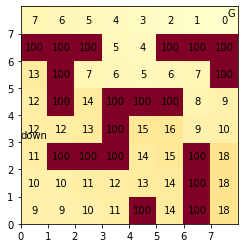

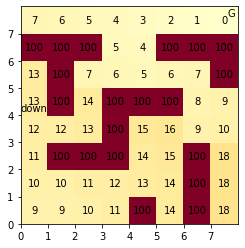

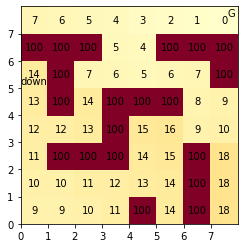

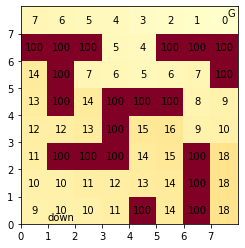

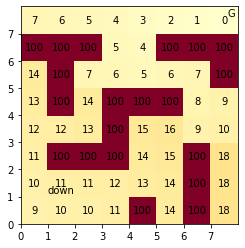

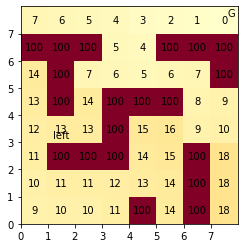

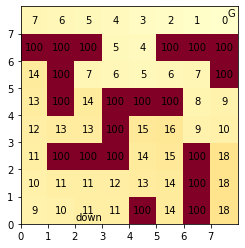

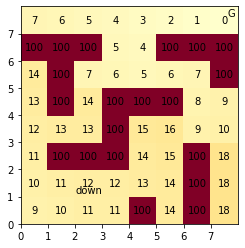

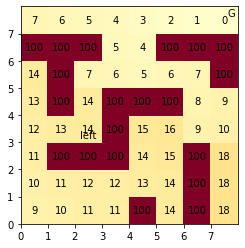

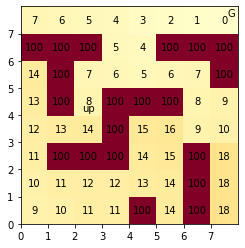

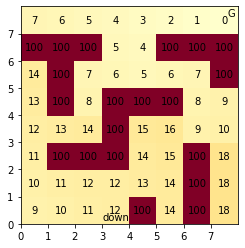

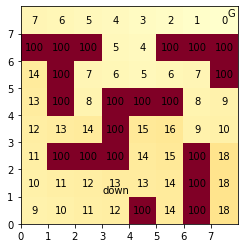

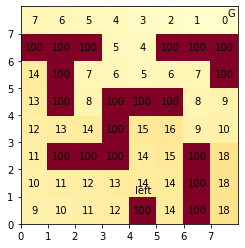

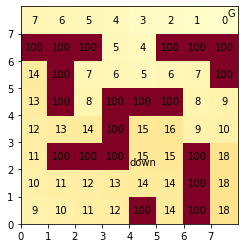

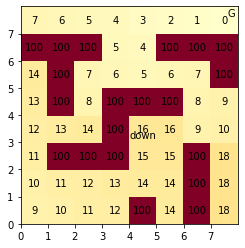

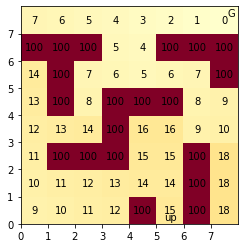

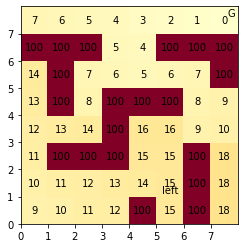

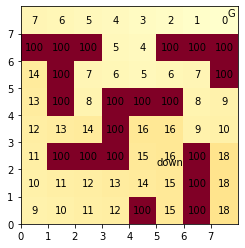

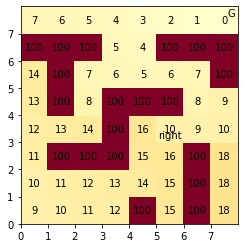

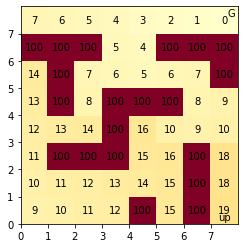

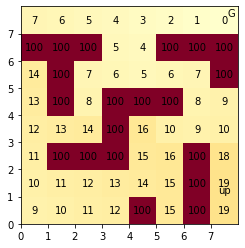

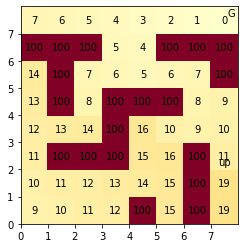

sweep 9


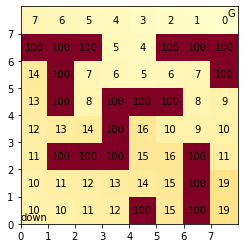

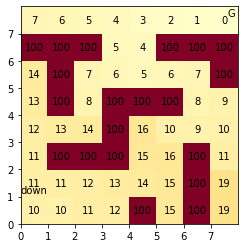

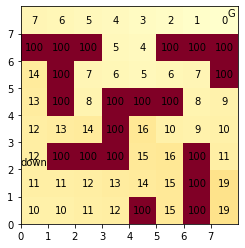

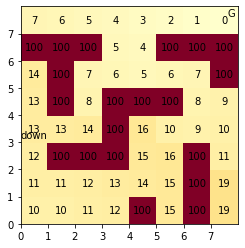

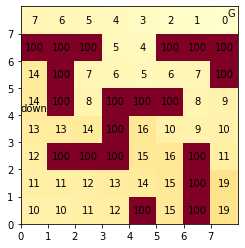

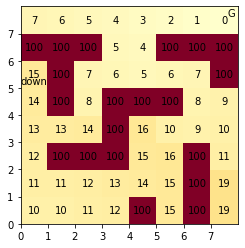

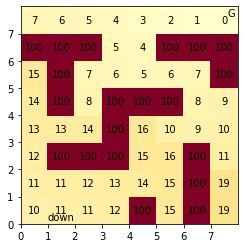

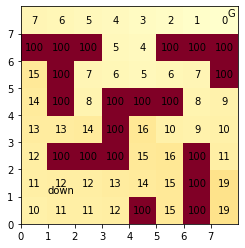

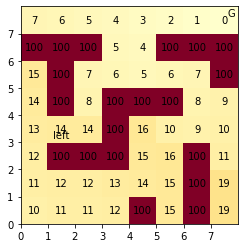

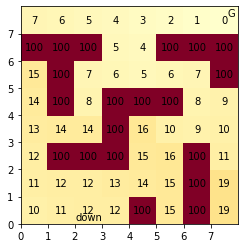

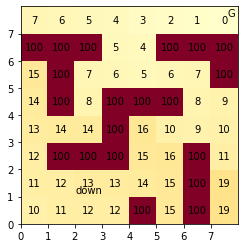

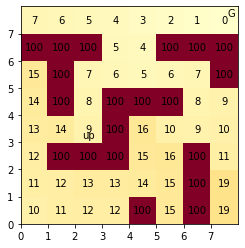

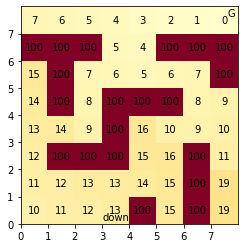

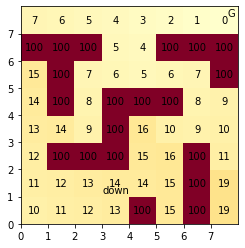

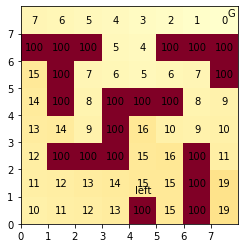

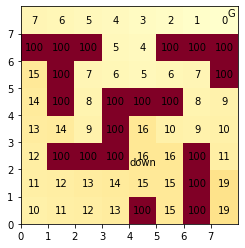

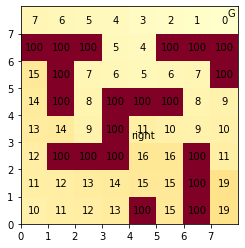

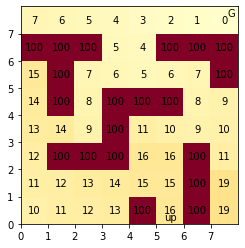

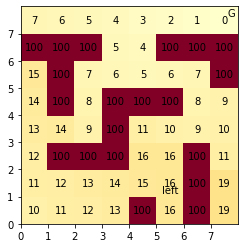

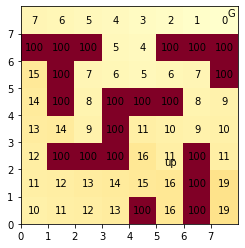

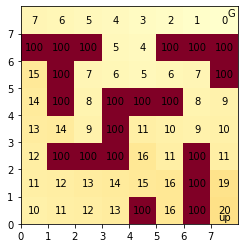

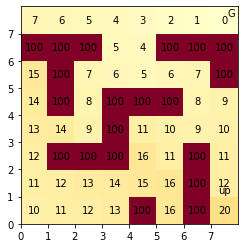

sweep 10


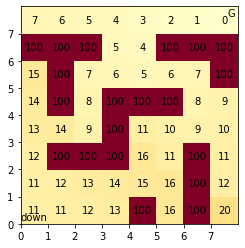

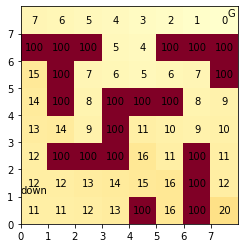

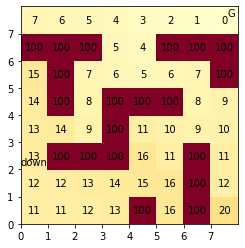

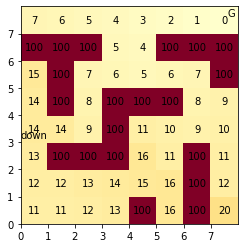

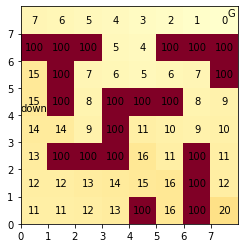

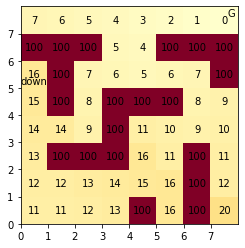

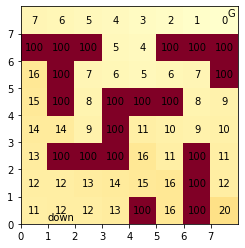

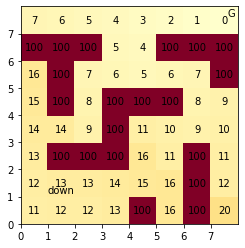

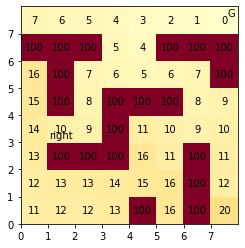

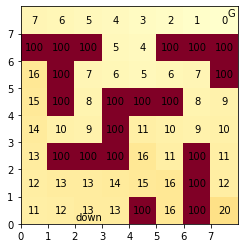

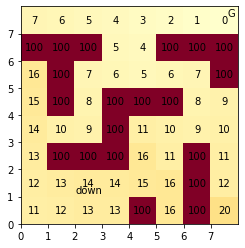

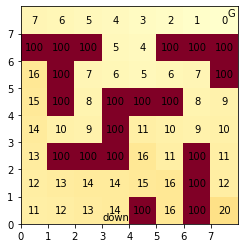

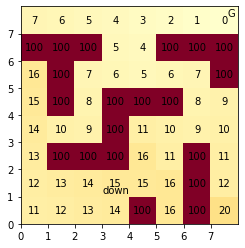

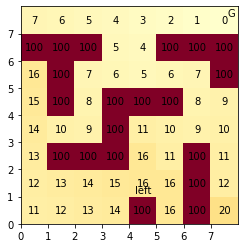

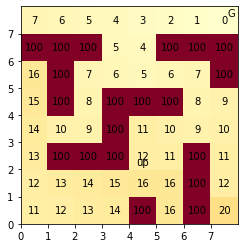

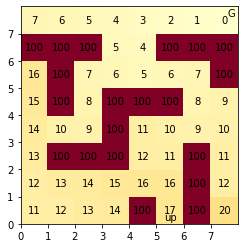

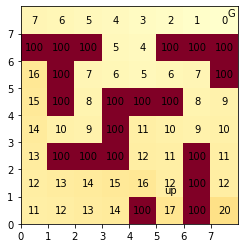

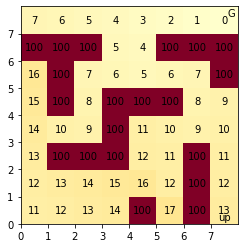

sweep 11


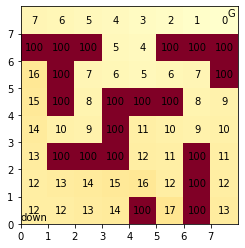

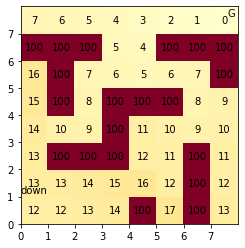

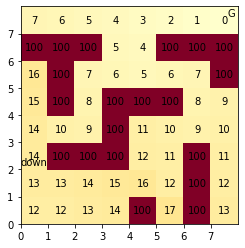

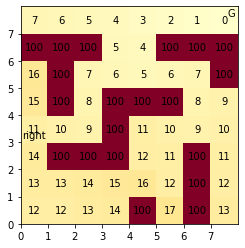

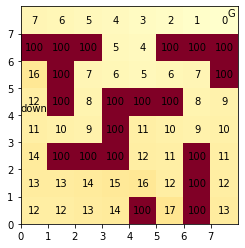

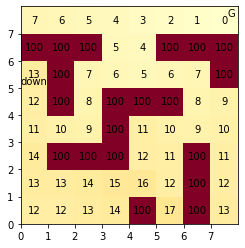

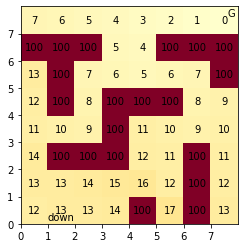

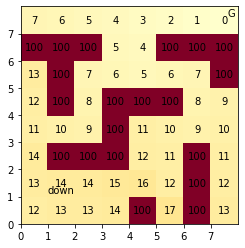

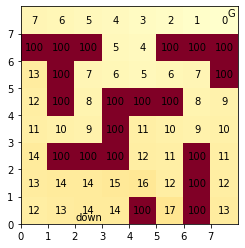

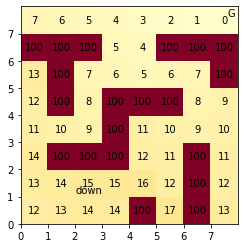

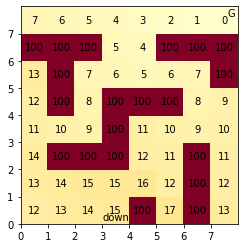

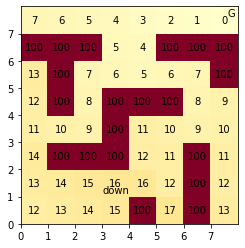

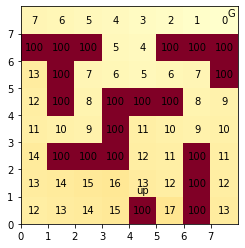

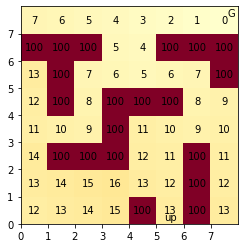

sweep 12


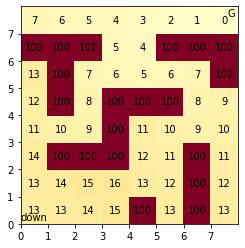

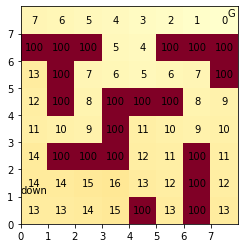

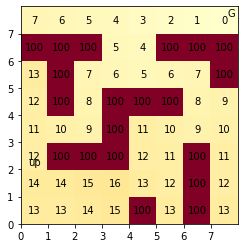

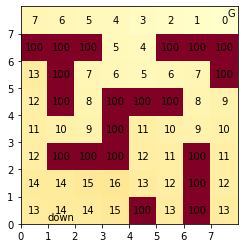

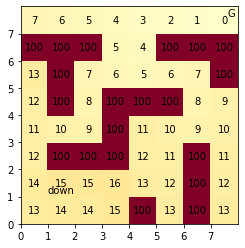

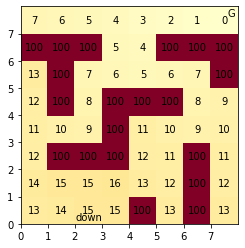

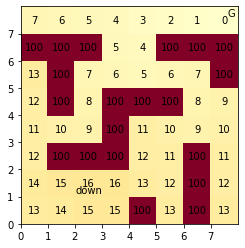

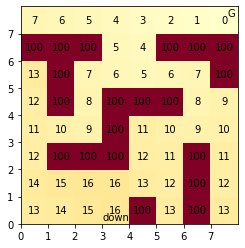

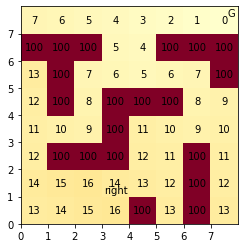

sweep 13


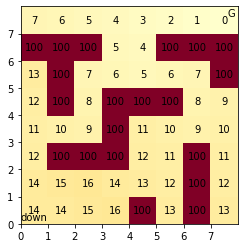

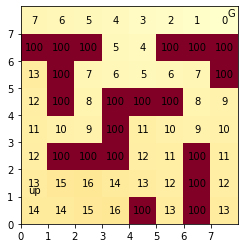

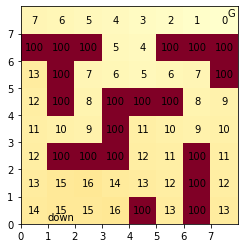

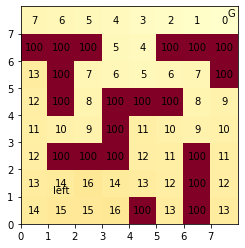

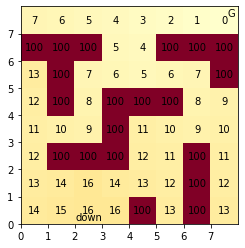

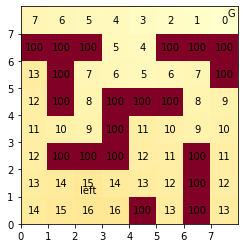

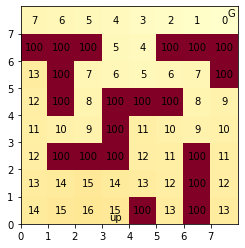

sweep 14


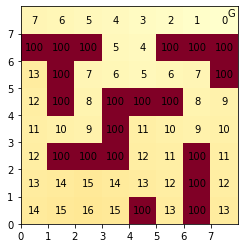

In [82]:
def sweep():
    changed = False
    
    for x in range(size):
        for y in range(size):
            min_cost = 100
            min_action = None
            for a in actions:
                c = action_value((x,y), a, goal)
                
                if c < min_cost:
                    min_cost = c
                    min_action = a

            if costs[x][y] != min_cost:
                costs[x][y] = min_cost
                draw((x,y),min_action)
                changed = True
                
            

    return changed

draw(None,None)
changed = True
n = 1
while changed:
    print("sweep",n)
    changed = sweep()
    n = n + 1
    
draw(None,None)